In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
#from importlib import reload
#from mppi import InputFiles as I, Calculators as C, Datasets as D

In [2]:
data_dir = 'rt_k100random_width100_no-com/FixSymm/ypp_freq_1.55-pol_circular'

In [3]:
file = os.path.join(data_dir,'o-freq_1.55-pol_circular.YPP-RT_occ_bands_iT6')

In [4]:
def parserArrayFromFile(fname):
    """"
    Build a list that contains the lines of fname avoiding the ones that start
    with #
    """
    lines = []
    with open(fname) as f:
        for l in f:
            if not l.startswith('#'):
                lines.append(l)
    #split each line in a list (of strings)
    larray = [[] for i in range(len(lines))]
    for ind,l in enumerate(lines):
        larray[ind] = l.split()
    #convert the string to double. If some elements is a string (it can happen in
    #the 4.4 Yambo version in the output file of a bands calculation) remove it
    for row in range(len(larray)):
        for col in range(len(larray[row])):
            try:
                larray[row][col] = float(larray[row][col])
            except ValueError:
                del larray[row][col]
    return larray

In [5]:
data = parserArrayFromFile(file)

I split the data when the first column (that contains the k-path) is zero

In [6]:
split_points = []
for ind,d in enumerate(data):
    if d[0] == 0.:
        split_points.append(ind)

In [7]:
split_points

[0, 94, 188, 282, 376, 470]

In [8]:
data_split = []
for ind in range(len(split_points)-1):
    data_split.append(data[split_points[ind]:split_points[ind+1]])
data_split.append(data[split_points[-1]:])

In [9]:
results = {}

In [10]:
results['k'] = [d[0] for d in data_split[0]]

In [11]:
bnd_rad = 'bnd'
occ_rad = 'occ'
ind0 = 5
for band,dd in enumerate(data_split): 
    key = bnd_rad+str(ind0+band)
    results[key] = [val[1] for val in dd]
    key = occ_rad+str(ind0+band)
    results[key] = [val[2] for val in dd]

In [12]:
results.keys()

dict_keys(['occ8', 'occ7', 'bnd8', 'bnd5', 'bnd6', 'k', 'bnd9', 'bnd10', 'bnd7', 'occ6', 'occ10', 'occ9', 'occ5'])

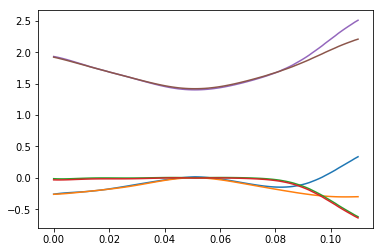

In [40]:
for ind in range(5,11):
    plt.plot(results['k'],results['bnd'+str(ind)])

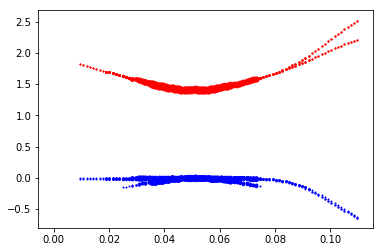

In [44]:
for ind in range(5,11):
    bnd_str = 'bnd'+str(ind)
    occ_str = 'occ'+str(ind)
    for k,e,occ in zip(results['k'],results[bnd_str],results[occ_str]):
        xx = abs(int(occ*60))
        color = 'blue' if occ < 0 else 'red'
        plt.scatter(k,e,s=xx,c=color)